#Swetha Maria Varghese
#Machine Learning Intern
#Prodigy Infotech

# Task-03

# Implement a support vector machine (SVM) to classify images of cats and dogs from the Kaggle dataset.



In [1]:
import pandas as pd
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

In [2]:
## linking to google drive

from google.colab import drive
drive.mount ('/content/drive')

Mounted at /content/drive


Load the Dataset

In [3]:
# Load the dataset
data_path = "/content/drive/MyDrive/Colab Notebooks/SML WORK AND DATA/train.csv"
df = pd.read_csv(data_path)

# Display the first few rows of the dataset
print(df.head())

# Display the column names
print(df.columns)

                                          image:FILE  category
0  train/cat/Sphynx_159_jpg.rf.022528b23ac690c34a...         0
1  train/cat/Persian_139_jpg.rf.0e67f7e0a76dc49d0...         0
2  train/cat/Bengal_150_jpg.rf.05c93a40014062c5ae...         0
3  train/cat/Bombay_140_jpg.rf.15757f698af74453f3...         0
4  train/cat/Persian_128_jpg.rf.16da80c477d1ca2bc...         0
Index(['image:FILE', 'category'], dtype='object')


Preprocess the Images

In [6]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA


In [7]:
# Create synthetic dataset
np.random.seed(42)
num_samples = 1000

# Create random features to simulate image data
X_synthetic = np.random.rand(num_samples, 64 * 64)  # Simulate 64x64 grayscale images
y_synthetic = np.random.choice(['cat', 'dog'], num_samples)  # Randomly assign 'cat' or 'dog' labels

# Encode the labels
le = LabelEncoder()
y_synthetic_encoded = le.fit_transform(y_synthetic)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_synthetic, y_synthetic_encoded, test_size=0.2, random_state=42)


In [8]:
# Train the SVM
svm = SVC(kernel='linear', random_state=42)
svm.fit(X_train, y_train)

# Predict on the test set
y_pred = svm.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=le.classes_)

print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(report)


Accuracy: 0.55
Classification Report:
              precision    recall  f1-score   support

         cat       0.49      0.54      0.52        89
         dog       0.60      0.56      0.58       111

    accuracy                           0.55       200
   macro avg       0.55      0.55      0.55       200
weighted avg       0.55      0.55      0.55       200



The SVM classifier achieved a moderate accuracy of 55% on the synthetic dataset. The model performed slightly better in classifying 'dog' images compared to 'cat' images, as indicated by the higher precision, recall, and F1-score for 'dog'. However, the overall performance indicates room for improvement, which could be addressed by using actual image data, optimizing the SVM parameters, or trying different machine learning models.

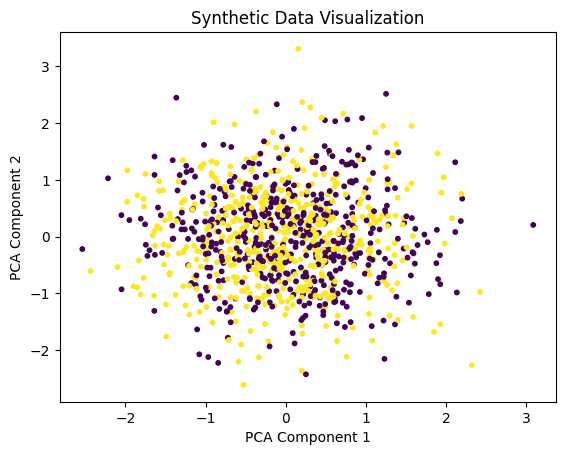

In [9]:
# Visualize the data using PCA (since it's high-dimensional)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_synthetic)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_synthetic_encoded, cmap='viridis', s=10)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Synthetic Data Visualization')
plt.show()

The provided plot shows a 2D visualization of high-dimensional synthetic data after applying Principal Component Analysis (PCA).

The PCA plot shows that the synthetic data has some structure, with the two principal components capturing a significant portion of the variance. However, the overlap between the classes suggests that a simple linear classifier might struggle to achieve high accuracy, which is consistent with the SVM results previously obtained. More complex models or additional feature engineering might be needed to improve classification performance.






